In [5]:
## Import Libraries
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype
%matplotlib inline

In [6]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
df = pd.read_csv("/Users\Hp\Downloads/adsmart.csv")

In [7]:
def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [8]:
df


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [9]:
## getting number of columns, row and column information
def get_data_info(SAd_df: pd.DataFrame):
    
    row_count, col_count = SAd_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return SAd_df.info()

In [10]:
## basic statistics of each column and see the data at glance
def get_statistics_info(SAd_df: pd.DataFrame):
    
    return SAd_df.describe(include='all')

In [11]:
# reading the extracted tweeter data and getting information

SAd_df = read_proccessed_data("/Users\Hp\Downloads/adsmart.csv")
get_data_info(SAd_df)

get_statistics_info(SAd_df)
SAd_df.head()

file read as csv
Number of rows: 8077
Number of columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


<AxesSubplot:>

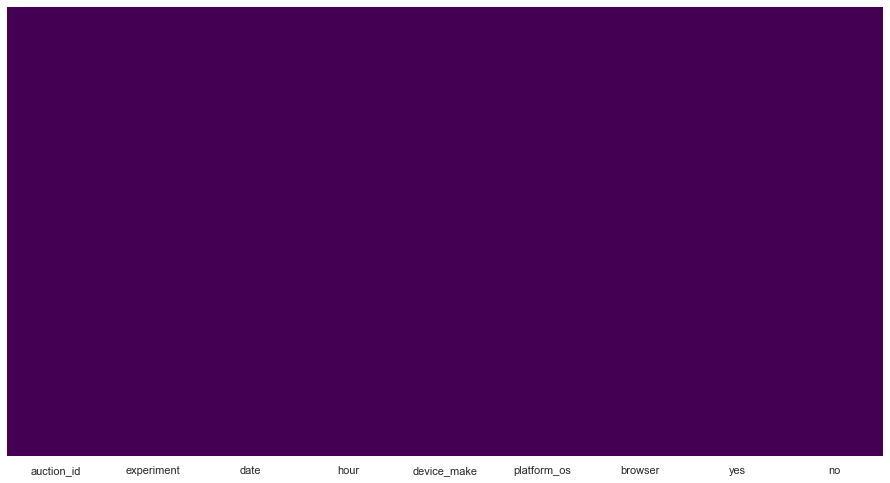

In [12]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(SAd_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##This shows the dataset doesn't have any missing value.

In [13]:
def percent_missing(df):

    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    return round((totalMissing / totalCells) * 100, 2)

In [14]:
print("The Ad Smart AB data dataset contains", percent_missing(SAd_df), "%", "missing values.")

The Ad Smart AB data dataset contains 0.0 % missing values.


In [15]:
contorl_num = SAd_df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['control']
exposed_num  = SAd_df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['exposed']

print(f"The number of entries in the control group is {contorl_num}")
print(f"The number of entries in the experiment group is {exposed_num}")

The number of entries in the control group is 4071
The number of entries in the experiment group is 4006


In [16]:
not_ans_df = SAd_df.query("yes == 0 & no == 0")
print(f"the number of users that did not respond is {not_ans_df.shape[0]} ")
print(f"the percentage of users that did not respond is {(not_ans_df.shape[0] / SAd_df.shape[0]) * 100}% ")

the number of users that did not respond is 6834 
the percentage of users that did not respond is 84.61062275597375% 


In [17]:
Ex_df=SAd_df.query("experiment=='exposed'")
EX_not_ans_df = Ex_df.query("yes == 0 & no == 0")
EX_Yes_ans_df=Ex_df.query("yes == 1")
print(f"the number of users that did not respond in the exposed group is {EX_not_ans_df.shape[0]} ")
print(f"the number of users that did  respond yes in the exposed group is {EX_Yes_ans_df.shape[0]} ")
Xexp=EX_Yes_ans_df.shape[0]
print(f"the percentage of users that did not respond in the exposed grou is {(EX_not_ans_df.shape[0] / Ex_df.shape[0]) * 100}% ")

the number of users that did not respond in the exposed group is 3349 
the number of users that did  respond yes in the exposed group is 308 
the percentage of users that did not respond in the exposed grou is 83.59960059910134% 


In [18]:
Co_df=SAd_df.query("experiment=='control'")
Co_not_ans_df = Co_df.query("yes == 0 & no == 0")
Co_Yes_ans_df=Co_df.query("yes == 1")
print(f"the number of users that did not respond in the control group is {Co_not_ans_df.shape[0]} ")
print(f"the number of users that did  respond yes in the Control group is {Co_Yes_ans_df.shape[0]} ")
Xcon=Co_Yes_ans_df.shape[0]
print(f"the percentage of users that did not respond in the control group is {(Co_not_ans_df.shape[0] / Co_df.shape[0]) * 100}% ")

the number of users that did not respond in the control group is 3485 
the number of users that did  respond yes in the Control group is 264 
the percentage of users that did not respond in the control group is 85.60550233357898% 


#Since the percentage of the number of users that did't respond for both groups have the same proportion we can work on the ones who gives a response.¶

In [21]:
RSAd_df = SAd_df.query("not (yes == 0 & no == 0)")
RSAd_df.shape
Npool=RSAd_df.shape[0]

In [22]:
Co_Yes_ans_df=Co_df.query("yes == 1")

In [23]:
#get unique values of each column
RSAd_df.nunique()

auction_id     1243
experiment        2
date              8
hour             24
device_make     115
platform_os       2
browser           8
yes               2
no                2
dtype: int64

In [24]:
# plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    

def plot_dist(df:pd.DataFrame, column:str):
    plt.figure(figsize=(9,7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
def plot_count2(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)

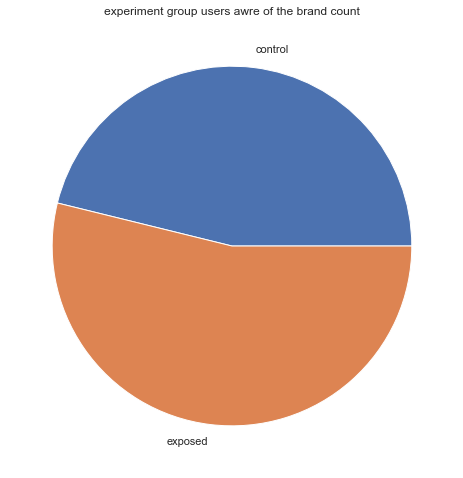

In [25]:
sums = RSAd_df["yes"].groupby(RSAd_df.experiment).sum()
plt.title("experiment group users awre of the brand count")
plt.pie(sums, labels=sums.index);

#The exposed group seems to have slightly more counts of yes than the exposed group.

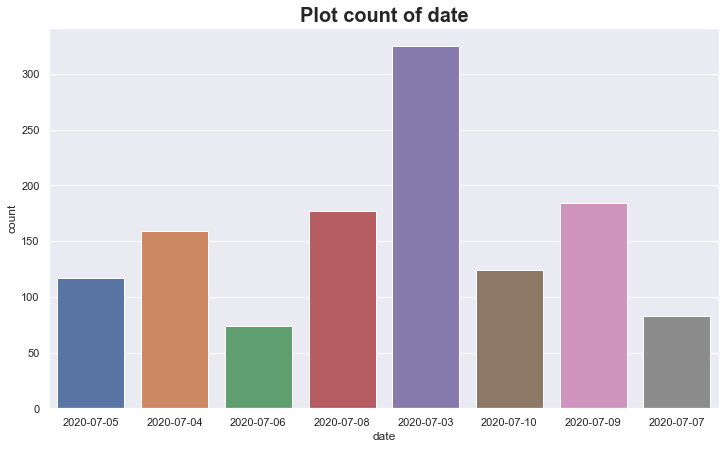

In [26]:
plot_count( RSAd_df,"date")

#users where more engaged on 2020-07-03

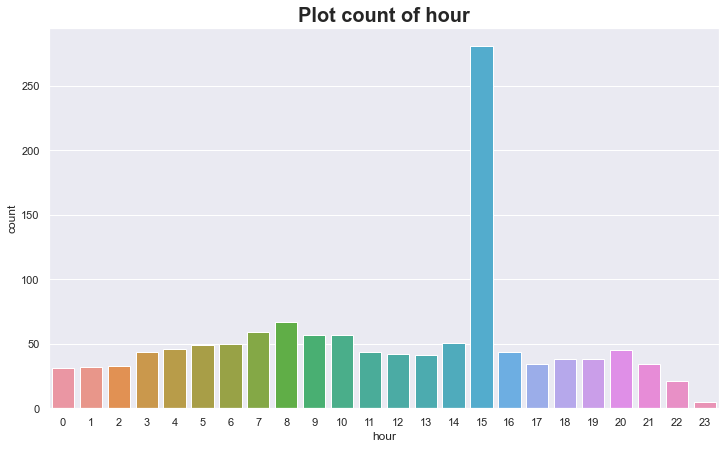

In [27]:
plot_count( RSAd_df,"hour")

#more users are enged on the hour of 15

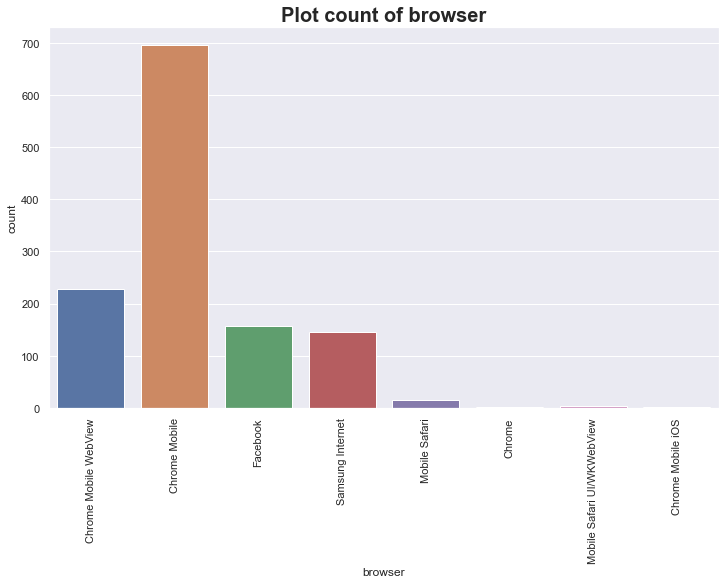

In [29]:
plot_count2( RSAd_df,"browser")

#users were more angaged on the chrome browser

In [30]:
RCo_df=RSAd_df.query("experiment=='control'")
Nco=RCo_df.shape[0]
print(f"the number of users that did  respond  in the Control group is {RCo_df.shape[0]} ")

the number of users that did  respond  in the Control group is 586 


In [31]:
REx_df=RSAd_df.query("experiment=='exposed'")
Nex=REx_df.shape[0]
print(f"the number of users that did  respond  in the Exposed group is {REx_df.shape[0]} ")

the number of users that did  respond  in the Exposed group is 657 


In [32]:
print(Npool,Nex,Nco)
print(Xexp,Xcon)

1243 657 586
308 264


#Classic A/B testing analysis Null hypothesis: there is no significant difference in brand awareness between the exposed and control groups in the current case Alternate hypothesis: there is a significant difference in brand awareness between the exposed and control groups in the current case with an assumptiono of this two

form the bussiness perspective lets say a 2% brand awarenes increase would# be practically significant.dmin=0.02
and have a confidence level of 95% Ho:d=0 d~N(0,SEpool) If d>1.96SEpool or d<-1.96SEpool Reject the null

In [33]:
Ppool=(Xcon+Xexp)/Npool
print(Ppool)

0.46017699115044247


In [34]:
import math
#Pool standard error
SEpool=math.sqrt(Ppool*(1-Ppool)*((1/Nco)+(1/Nex)))
print(SEpool)

0.028319932727228023


In [35]:
## diference between Pexp and Pcon
d=Xexp/Nex-Xcon/Nco
print(d)

0.018285619295484168


In [36]:
#margin of error
m=1.96*SEpool
print(m)

0.055507068145366927


In [37]:
lb=d-m
ub=d+m
print(lb,ub)

-0.03722144884988276 0.0737926874408511


#From this output that we can say we dont have enough power to draw a conclusion we need more data to reach a conclusion.

